In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict, train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
irisDF = pd.read_csv('../data/iris.csv')
irisDF

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


100번째 까지만 2진분류

In [4]:
DF1 = irisDF.iloc[:100]
DF1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [5]:
featureDF = DF1[DF1.columns[2:-1]]
targetDF = (DF1.species == 'setosa')

In [6]:
targetDF

0      True
1      True
2      True
3      True
4      True
      ...  
95    False
96    False
97    False
98    False
99    False
Name: species, Length: 100, dtype: bool

In [7]:
print(f'featureDF: {featureDF.shape}, targetDF: {targetDF.shape}')

featureDF: (100, 2), targetDF: (100,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF, test_size=0.2, random_state=17, stratify=targetDF)

In [9]:
scaler=StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [10]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt

svc = SVC(kernel='linear', C=1.0, probability=True)

In [11]:
svc.fit(scaled_X_train, y_train)

SVC(kernel='linear', probability=True)

경계 그리기

In [12]:
xx = scaler.transform(featureDF)
xx

array([[-1.00412419, -1.05503496],
       [-1.00412419, -1.05503496],
       [-1.07379456, -1.05503496],
       [-0.93445382, -1.05503496],
       [-1.00412419, -1.05503496],
       [-0.79511308, -0.69201218],
       [-1.00412419, -0.87352357],
       [-0.93445382, -1.05503496],
       [-1.00412419, -1.05503496],
       [-0.93445382, -1.23654635],
       [-0.93445382, -1.05503496],
       [-0.86478345, -1.05503496],
       [-1.00412419, -1.23654635],
       [-1.21313529, -1.23654635],
       [-1.14346492, -1.05503496],
       [-0.93445382, -0.69201218],
       [-1.07379456, -0.69201218],
       [-1.00412419, -0.87352357],
       [-0.79511308, -0.87352357],
       [-0.93445382, -0.87352357],
       [-0.79511308, -1.05503496],
       [-0.93445382, -0.69201218],
       [-1.28280566, -1.05503496],
       [-0.79511308, -0.51050079],
       [-0.65577234, -1.05503496],
       [-0.86478345, -1.05503496],
       [-0.86478345, -0.69201218],
       [-0.93445382, -1.05503496],
       [-1.00412419,

In [13]:
# 가로축 x1 : featureDF['petal_length']
x1 = xx[:,0]
# 세로축 x2 : featureDF['petal_width']
x2 = xx[:,1]

In [14]:
# 가중치w - 여기서 x1,x2의 변화도를 뜻함
w = svc.coef_[0]
w

array([-1.02342817, -0.94667129])

In [15]:
# 기울기 a는 w[1]/w[0]
a = w[1]/w[0]
a

0.925000230009974

In [16]:
# 직선식은 w[0]*x1 + w[1]*x2 + intercept = 0
# x2 = -a*x1 - intercept/w[1]
# Y = -a*X - intercept/w[1]
svc.intercept_[0]

-0.29701758109790566

In [17]:
# 마진 연습(1)
# w[0]*x1 + w[1]*x2 + intercept = 1
# Y = -a*X -(1-intercept)/w[1]

In [18]:
x1.shape, x2.shape

((100,), (100,))

In [19]:
# 정의역 X
X = np.linspace(x1.min(), x1.max(),100)
print(len(X))
# 공역 Y
Y = -a * X - svc.intercept_[0]/w[1]

100


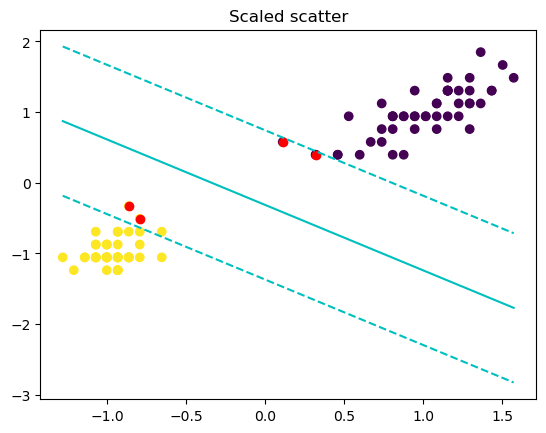

In [20]:
plt.scatter(x1,x2,c=targetDF)
plt.title('Scaled scatter')

# 경계 그리기
plt.plot(X, Y,'c-')
# 마진

plt.plot(X, Y+(1/w[1]), 'c--')
plt.plot(X, Y-(1/w[1]), 'c--')

# 서포트 벡터 머신 표시
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], color='red')

plt.show()

In [21]:
targetDF

0      True
1      True
2      True
3      True
4      True
      ...  
95    False
96    False
97    False
98    False
99    False
Name: species, Length: 100, dtype: bool